In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
ambientes = [
    "python-cache",
    # "python-no-cache",
    "ruby-cache",
    # "ruby-no-cache",
]
qtd_usuarios_teste = ["30", "60", "90"]

folder_to_label_map = {
    "python-cache": "Python (Cache)",
    # "python-no-cache": "Python (No Cache)",
    "ruby-cache": "Ruby (Cache)",
    # "ruby-no-cache": "Ruby (No Cache)",
}

df_results = pd.DataFrame()

for ambiente in ambientes:
    for qtd_usuario in qtd_usuarios_teste:
        df = pd.read_csv(f"tests/le/{ambiente}/{qtd_usuario}/rst_stats.csv")
        df["Ambiente Label"] = folder_to_label_map[ambiente]
        df["Users Size"] = qtd_usuario
        df["95%"] = df["95%"] / 1000
        df_results = pd.concat([df_results, df]).reset_index(drop=True)
        df_results = df_results[df_results["Name"] == "Aggregated"]

df_results

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,80%,90%,95%,98%,99%,99.9%,99.99%,100%,Ambiente Label,Users Size
0,NaN,Aggregated,16305,0,16,47.141435,13.7547,6339.2334,72530.800000,54.564648,...,17,24,0.032,150,1300,4700,6100,6300,Python (Cache),30
1,NaN,Aggregated,34500,0,16,19.501267,13.5251,1875.7525,72530.800000,115.240504,...,20,26,0.033,39,50,120,1300,1900,Python (Cache),60
2,NaN,Aggregated,51528,0,16,18.505836,13.6175,1256.3786,72536.882006,172.224912,...,18,24,0.032,35,38,330,820,1300,Python (Cache),90
3,NaN,Aggregated,17490,0,5,10.620787,2.3128,1082.3523,71667.466667,58.525729,...,7,13,0.021,24,62,510,1100,1100,Ruby (Cache),30
4,NaN,Aggregated,35010,0,5,7.848562,2.3783,1549.2691,71667.466667,116.877663,...,7,13,0.021,24,26,140,1200,1500,Ruby (Cache),60
20,NaN,Aggregated,52427,0,6,8.423266,2.4071,1275.8750,71674.269270,175.095567,...,9,15,0.022,26,32,120,960,1300,Ruby (Cache),90


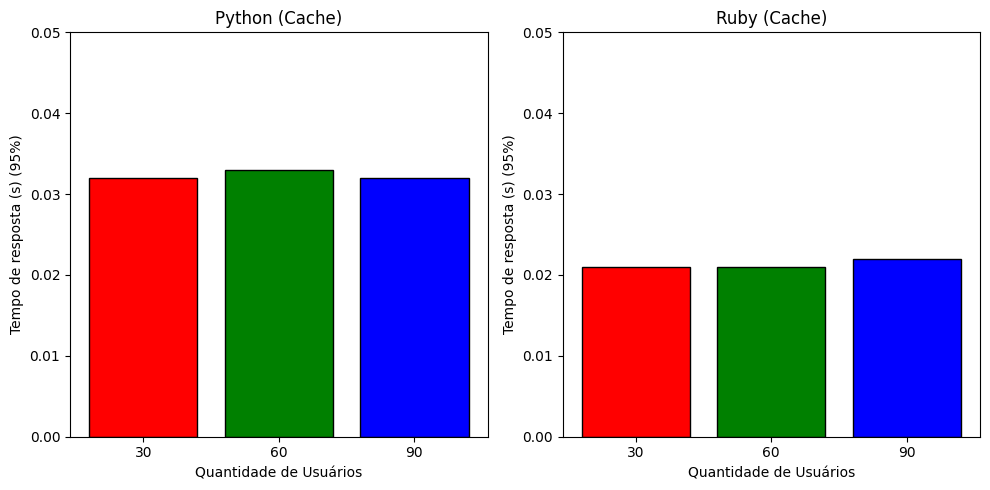

In [17]:
width_fig = 5

qtd_ambientes = len(ambientes)
fig, axs = plt.subplots(
    1, qtd_ambientes, tight_layout=True, figsize=(qtd_ambientes * width_fig, width_fig)
)

colors = ["red", "green", "blue"]

for i, ambiente in enumerate(ambientes):
    ambiente_label = folder_to_label_map[ambiente]

    df = df_results[df_results["Ambiente Label"] == ambiente_label]
    axs[i].set_ylim(0, 0.05)
    axs[i].set_title(ambiente_label)
    axs[i].bar(
        df["Users Size"],
        df["95%"],
        color=colors,
        edgecolor="black",
    )
    axs[i].set_xlabel("Quantidade de Usuários")
    axs[i].set_ylabel("Tempo de resposta (s) (95%)")

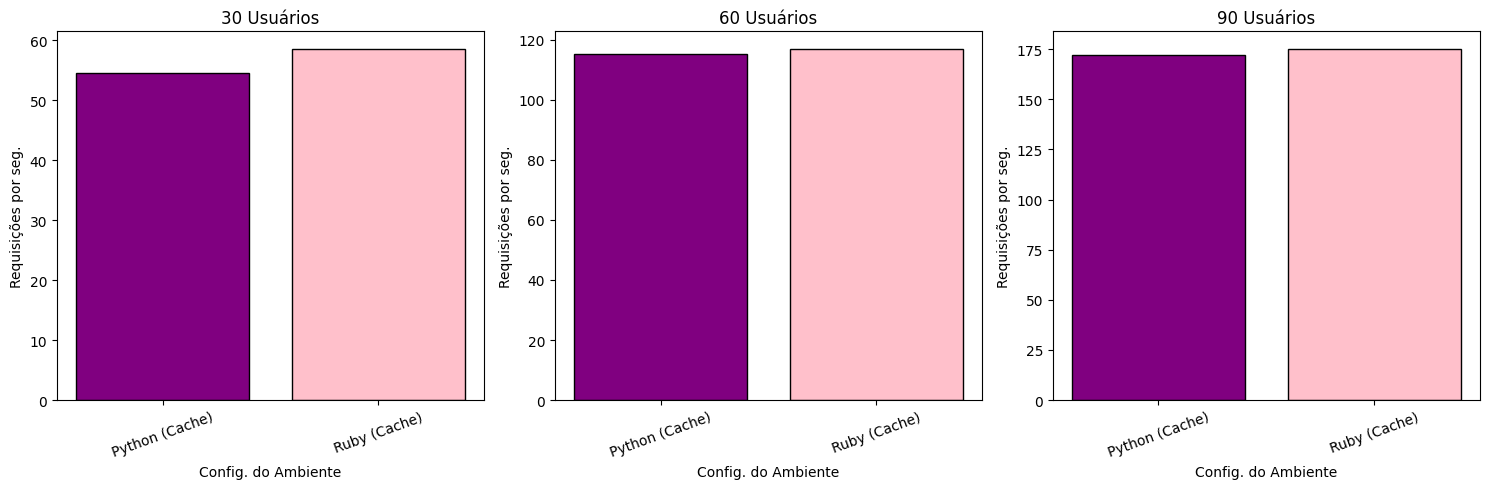

In [18]:
qtd_qtd_usuarios = len(qtd_usuarios_teste)
fig, axs = plt.subplots(
    1,
    qtd_qtd_usuarios,
    tight_layout=True,
    figsize=(qtd_qtd_usuarios * width_fig, width_fig),
)

colors = ["purple", "pink", "cyan", "orange"]

for i, qtd_usuario in enumerate(qtd_usuarios_teste):
    df = df_results[df_results["Users Size"] == qtd_usuario]
    # axs[i].set_ylim(0, 20)
    axs[i].set_title(f"{qtd_usuario} Usuários")
    axs[i].bar(
        df["Ambiente Label"],
        df["Requests/s"],
        color=colors,
        edgecolor="black",
    )
    axs[i].set_xlabel("Config. do Ambiente")
    axs[i].set_ylabel("Requisições por seg.")
    axs[i].tick_params(axis="x", rotation=20)